# Traffic Signs Recognition

### Goal of this project: 
Given a various traffic signs along with images dataset,  
we are challenged to classify traffic signs present in the image into different categories.

### Notebook Workflow:
- Setup Libraries
- Load the Data
- Preprocessing 
- Baseline(Logistic Regression)
- Build Convolutional Neural Networks (CNN)

### Extra:
- Visualization

# 

### 1. Setup Libraries:

#### Data manipulation and Preprocessing libraries:

In [186]:
import os
import pathlib
import numpy as np

#### Visualization libraries:

In [175]:
import matplotlib.pyplot as plt

#### Sci-Kit Learn libraries:

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model    import LogisticRegression

In [4]:
from sklearn.preprocessing   import StandardScaler

In [151]:
from sklearn.metrics         import accuracy_score

#### Tensorflow libraries:

In [24]:
from keras.models                          import Sequential

In [5]:
from tensorflow.keras.utils                import to_categorical

In [26]:
from tensorflow.keras.layers               import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D 

In [6]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator, img_to_array, array_to_img, load_img

# 

### 2. Load The Data 

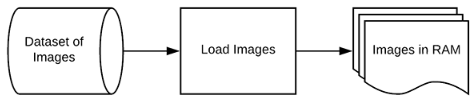

In [7]:
data_path  = '/Users/macbookproretina13inch/Downloads/German/Train'

In [8]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(num_categories):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img   = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)    
    return images, labels

In [9]:
num_categories = len(os.listdir(data_path))
num_categories

43

In [132]:
images, labels = load_data(data_path)

In [133]:
images = np.array(images)

In [ ]:
labels = np.array(labels)

# 

### 3. Preprocessing

- Set height and width size for the images

In [11]:
img_height = 30
img_width  = 30

- Set the Labels (Classes)

In [12]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

- Reshape size of images

In [81]:
images.shape
images = images.reshape(39359,30*30*3)
images.shape

(39359, 2700)

# 

#### Spliting the images into train,  validation  and test sets

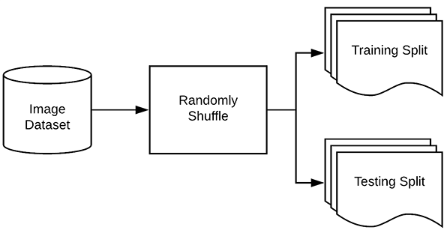

In [85]:
X, X_test, y, y_test = train_test_split(images, labels, test_size=.2, random_state=10, shuffle=True)

In [86]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10, shuffle=True)

# 

### 4. Baseline(Logistic Regression)

In [18]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=15)

- Feature scaling for train, val, and test so that we can run our model

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [21]:
# Validate score

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2:  {lm.score(X_val, y_val):.3f}')

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear Regression val R^2:  0.915


In [22]:
# Test score
lm.fit(X,y)
print(f'Linear Regression test R^2:{lm.score(X_test, y_test):.3f}')

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear Regression test R^2:0.922


Wow! , we get  92%  accuracy in our Baseline, but do we can get more with Deep learning models? 

# 

# 

####  Preprocessing for Deep learning models: 

In [134]:
# One-hot encode the labels

In [135]:
labels = to_categorical(labels)

In [ ]:
# re-split 

In [138]:
X, X_test, y, y_test = train_test_split(images, labels, test_size=.2, random_state=10, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10, shuffle=True)

In [139]:
# Normalization 

In [140]:
X_train /= 255
X_val   /= 255

In [ ]:
#shape overview

In [142]:
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])

X_train shape: (23615, 30, 30, 3)
Number of images in X_train 23615


In [143]:
print('X_val shape:', X_val.shape)
print('Number of images in X_val', X_val.shape[0])

X_val shape: (7872, 30, 30, 3)
Number of images in X_val 7872


In [144]:
print('y_train shape:', y_train.shape)
print('Number of images in y_train', y_train.shape[0])

y_train shape: (23615, 43)
Number of images in y_train 23615


In [145]:
print('y_val shape:', y_val.shape)
print('Number of images in y_val', y_val.shape[0])

y_val shape: (7872, 43)
Number of images in y_val 7872


In [146]:
input_shape=(30,30,3)

# 

# 

### 5. Build Convolutional Neural Networks (CNN)

In [157]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(num_categories, activation='softmax'))

# Compiling the model
lr = 0.001
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)        

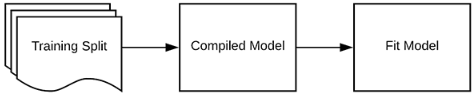

In [158]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val) ,epochs=15)

Epoch 1/15
738/738 [==============================] - 30s 40ms/step - loss: 1.7905 - accuracy: 0.4988 - val_loss: 0.6116 - val_accuracy: 0.8103
Epoch 2/15
738/738 [==============================] - 33s 45ms/step - loss: 0.4858 - accuracy: 0.8464 - val_loss: 0.2324 - val_accuracy: 0.9313
Epoch 3/15
738/738 [==============================] - 37s 50ms/step - loss: 0.2871 - accuracy: 0.9120 - val_loss: 0.1580 - val_accuracy: 0.9614
Epoch 4/15
738/738 [==============================] - 30s 40ms/step - loss: 0.2023 - accuracy: 0.9382 - val_loss: 0.1232 - val_accuracy: 0.9675
Epoch 5/15
738/738 [==============================] - 26s 35ms/step - loss: 0.1513 - accuracy: 0.9526 - val_loss: 0.0865 - val_accuracy: 0.9750
Epoch 6/15
738/738 [==============================] - 39s 52ms/step - loss: 0.1218 - accuracy: 0.9622 - val_loss: 0.0831 - val_accuracy: 0.9773
Epoch 7/15
738/738 [==============================] - 44s 60ms/step - loss: 0.1062 - accuracy: 0.9663 - val_loss: 0.0871 - val_accuracy:

#### Display of the accuracy and the loss values

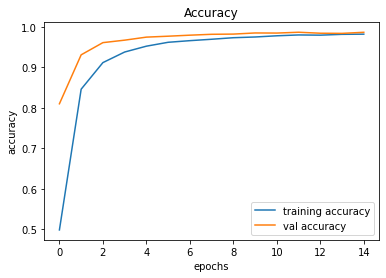

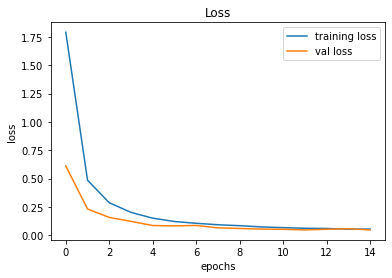

In [176]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

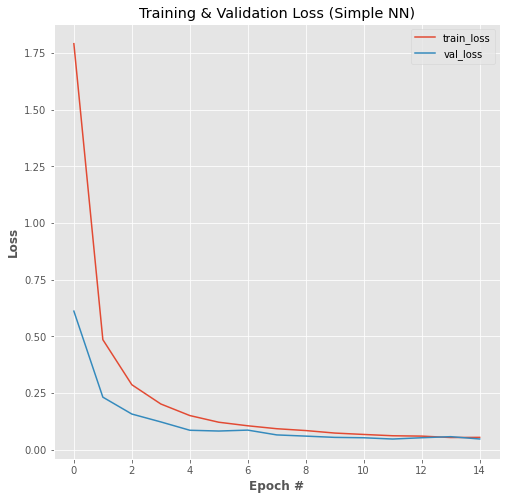

In [183]:
# plot the training and validation loss
N = np.arange(0, 15)
plt.style.use("ggplot")
plt.figure(figsize = [8,8])
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

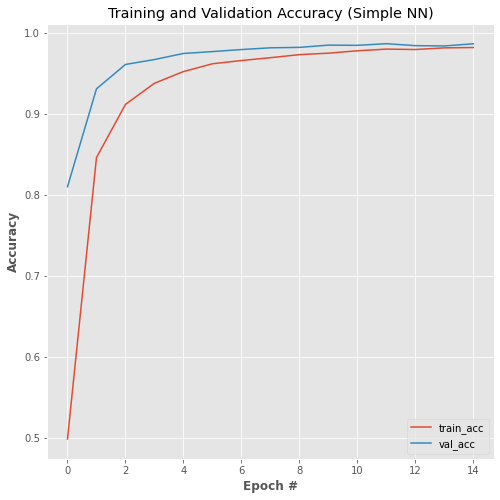

In [184]:
# plot the training and validation accuracy
N = np.arange(0, 15)
plt.style.use("ggplot")
plt.figure(figsize = [8,8])
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

#### Accuracy Score of CNN model

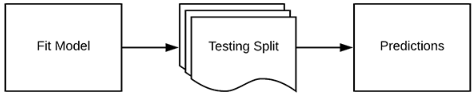

In [162]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [163]:
accuracy_score(y_test, y_pred)

0.9733231707317073

The accuracy above, show that with deep learning model (CNN) we get better accuracy, up to 5 percent. 

# 

# 

### Extra - Visualization

- Visualizing all the different Signs

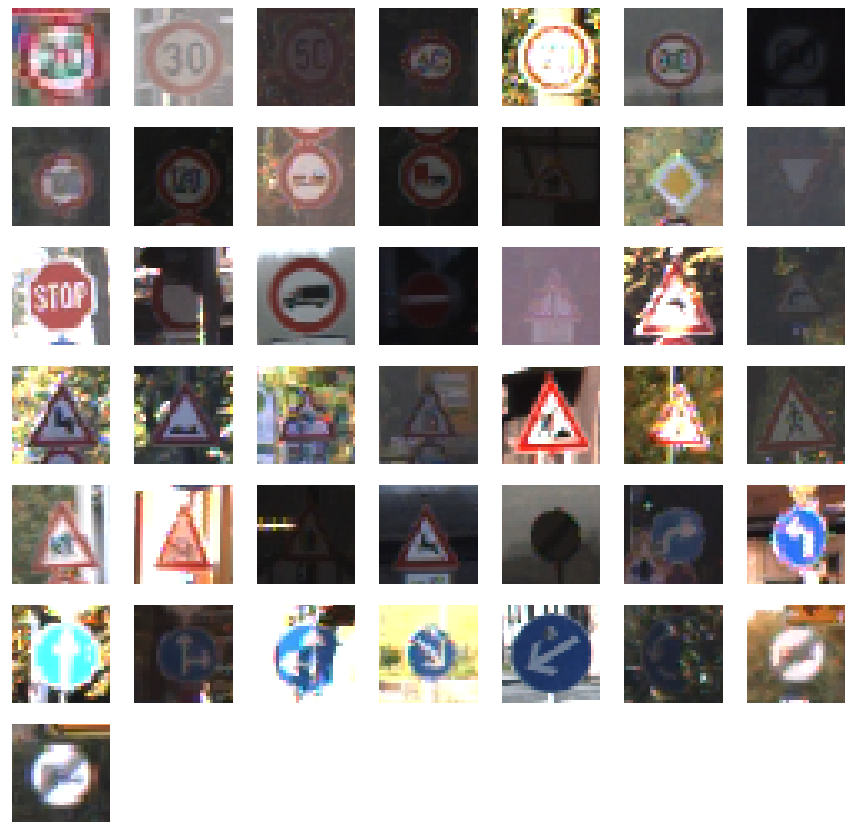

In [187]:
img_dir = pathlib.Path(data_path)
plt.figure(figsize=(15,15))
index = 0

for i in range(num_categories):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(img_width, img_height))
    plt.imshow(img)
plt.show()

#### - End of this notebook - 